# Task 1
**1)**. In the required/given/following algorithm we considered the value of distance around which the maximum values of the distances lie. It is because when we consider any two images of the sky-patches where certain area of the sky is the same, then the distance between the sources of the second image to the respective sources of the first image which are representing the same sky-patch area should be the same(almost).

Therefore we get a peak, the maximum value of bin, in histogram somewhere on x-axis. And the heighht of this bin is directly proportional to how much patch of sky is the same/overlapped between the given two images.

Good object patterns for this algorithm are the patterns where this bin values/peak is high and is very prominent/distinguishable from other bin/peak values.

And bad object patterns for this algorithm are the patterns where either more than one bins/peaks have the same value or or bin values are not distinguishable.

**2)**. Calculating all the distances and counting which value is repeated the most can not work for such analysis. Because, the values of the distance are all different from each other. It is due to the fact that our image file gives the positions of the sources in pixels which have error values of +/-1. Second reason is that our sky images are of sperical origin/shape. So, for the given patches spherical and linear approximation is almost the same, but still it is not the same.

So, using histogram analysis is the best approach here because it takes into account all the values within a certain range. So, we can include our error range also into account to get the most accurate results.

**3)**.Assuming that we can estimate object positions with an accuracy of up to one CCD pixel, I have selected the bin size of 3 pixels. Because, if we consider that our source at some certain pixel the taking error into account means that it can be also placed on next or previous pixel in reality. So, when we apply addition or subtraction, the error values also add up.

So, for ou distance the bin size should be +/-2 pixel of the real distance (in both x and y coordinates).
So, I selected bin size = 5.

# Task 2

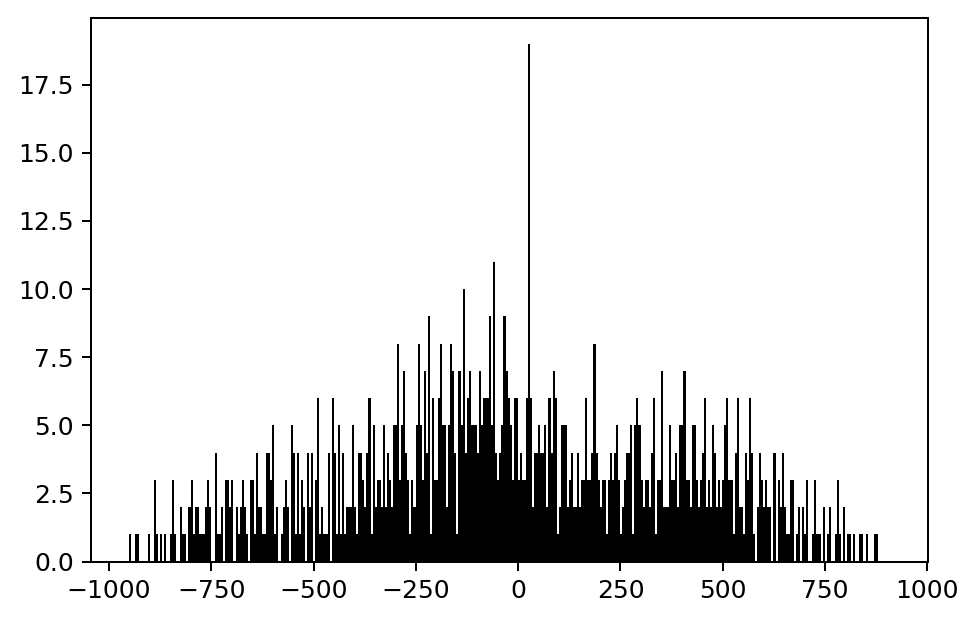

For x-shift between "image013269" and "image013271" the maximim value of the "bin" is "19.0" at the place "[14.5]" on x-axis.


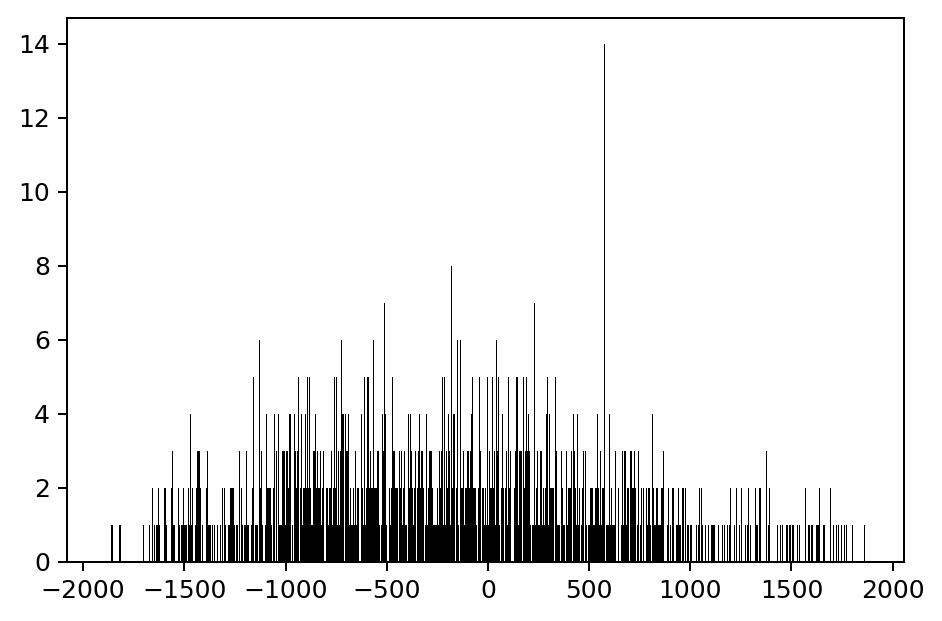

For y-shift between "image013269" and "image013271" the maximim value of the "bin" is "14.0" at the place "[290.]" on x-axis.

 
 
 image "image013271" is shifted " [14.5]" pixels x-axis 
 and "[290.]" pixels on y-axis from the image "image013269"


(14.5, 290.0)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



def distance_function_first(First_image, Second_image, bin_width):
    
    # Loading the data in the form of arrays from the files
    Data_arrray_1 = np.loadtxt(First_image)
    Data_arrray_2 = np.loadtxt(Second_image)

    # separately storing "x" and "y" coordinates into arrays
    Data_arrray_1_x = Data_arrray_1[:,0]
    Data_arrray_1_y = Data_arrray_1[:,1]
    Data_arrray_2_x = Data_arrray_2[:,0]
    Data_arrray_2_y = Data_arrray_2[:,1]

    ##############################################################

    # For x-axis
    # subtracting all elements of "Second_image" file from the "First_image" file
    
    distance_x_axis = Data_arrray_1_x[:, np.newaxis] - Data_arrray_2_x[ np.newaxis,:]
    distance_x_axis = distance_x_axis.flatten()
    distance_x_axis.shape

                            #################################

    # Creating an array with given/selected bin sizes
    bin_array_for_x_diff = np.arange(int(distance_x_axis.min()),int(distance_x_axis.max())+1, bin_width)

    plt.figure( dpi = 180)
    
    # Plotting and storing data from histogram for further use
    bin_value_for_x, x_position_for_x, _ = plt.hist(distance_x_axis, bins = bin_array_for_x_diff, color='black')
    
    
    # Calculating the place of bin with maximum value on x-axis. And as it gives us the point from where
    # the width of the bin starts so, I am taking/selecting the middle point between the start and end point of the bin.
    
    max_value_place_for_x = (x_position_for_x[np.where(bin_value_for_x == bin_value_for_x.max())]+bin_width)/2

    plt.show()

    print(f'For x-shift between "{First_image[5:-4]}" and "{Second_image[5:-4]}" the maximim value of the "bin" is "{bin_value_for_x.max()}" at the place "{max_value_place_for_x}" on x-axis.')

    ######################################################################

    # Now for y-axis
    # subtracting all elements of "Second_image" file from the "First_image" file
    
    distance_y_axis = Data_arrray_1_y[:, np.newaxis] - Data_arrray_2_y[ np.newaxis,:]
    distance_y_axis = distance_y_axis.flatten()
    distance_y_axis.shape

    # print(distance_y_axis.min(),distance_y_axis.max(),distance_y_axis.shape)

                    ###################################

    bin_array_for_y_diff = np.arange(int(distance_y_axis.min()),int(distance_y_axis.max())+1, bin_width) 

    plt.figure( dpi = 180)
    bin_value_for_y, x_position_for_y, _ = plt.hist(distance_y_axis, bins = bin_array_for_y_diff, color='black')

    
    # Calculating the place of bin with maximum value on x-axis. And as it gives us the point from where the width
    # of the bin starts so, I am taking/selecting the middle point between the start and end point of the bin.
    
    max_value_place_for_y = (x_position_for_y[np.where(bin_value_for_y == bin_value_for_y.max())]+bin_width)/2

    plt.show()

    print(f'For y-shift between "{First_image[5:-4]}" and "{Second_image[5:-4]}" the maximim value of the "bin" is "{bin_value_for_y.max()}" at the place "{max_value_place_for_y}" on x-axis.')


    ###############################################################################################


    # As we are substracting the values of "Data_arrray_2_x" for "Data_arrray_1_x" 
    # and "Data_arrray_2_y" from "Data_arrray_1_y" so 

    print(f'\n \n \n image "{Second_image[5:-4]}" is shifted " {max_value_place_for_x}" pixels x-axis \n and "{max_value_place_for_y}" pixels on y-axis from the image "{First_image[5:-4]}"')

    ##############################################################################################

    return (max_value_place_for_x[0], max_value_place_for_y[0])
    
    
    
# storing the addresses/strings of the required image files
First_image = 'data/image013269.asc'
Second_image = 'data/image013271.asc'

# Selecting the bin width according to our choice 
bin_width = 5

# Calling the function to compute our data
distance_function_first(First_image, Second_image, bin_width)

# Task 3

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Defining a new function to compute our data without plotting histogram for our further calculations
def distance_function(First_image, Second_image, bin_width):
    
    # Loading the data in the form of arrays from the files
    Data_arrray_1 = np.loadtxt(First_image)
    Data_arrray_2 = np.loadtxt(Second_image)

    # separately storing "x" and "y" coordinates into arrays
    Data_arrray_1_x = Data_arrray_1[:,0]
    Data_arrray_1_y = Data_arrray_1[:,1]
    Data_arrray_2_x = Data_arrray_2[:,0]
    Data_arrray_2_y = Data_arrray_2[:,1]

    ##############################################################

    # For x-axis
    # subtracting all elements of "Second_image" file from the "First_image" file
    distance_x_axis = Data_arrray_1_x[:, np.newaxis] - Data_arrray_2_x[ np.newaxis,:]
    distance_x_axis = distance_x_axis.flatten()
    distance_x_axis.shape

                            #################################

    # Creating an array with given/selected bin sizes
    bin_array_for_x_diff = np.arange(int(distance_x_axis.min()),int(distance_x_axis.max())+1, bin_width) 
    
    # Storing data from histogram function for our further calculations
    bin_value_for_x, x_position_for_x = np.histogram(distance_x_axis, bins = bin_array_for_x_diff)
    
    # Calculating the place of bin with maximum value on x-axis. And as it gives us the point from where
    # the width of the bin starts so, I am taking/selecting the middle point between the start and end point of the bin.
    
    max_value_place_for_x = (x_position_for_x[np.where(bin_value_for_x == bin_value_for_x.max())]+bin_width)/2

    # You can remove the hashtag of the following line to check the data at current stage
#     print(f'For x-shift between "{First_image[5:-4]}" and "{Second_image[5:-4]}" the maximim value of the "bin" is "{bin_value_for_x.max()}" at the place "{max_value_place_for_x}" on x-axis.')

    ################################################################################################

    # Now for y-axis
    # subtracting all elements of "Second_image" file from the "First_image" file
    distance_y_axis = Data_arrray_1_y[:, np.newaxis] - Data_arrray_2_y[ np.newaxis,:]
    distance_y_axis = distance_y_axis.flatten()
    distance_y_axis.shape

                            #################################
        
    # Creating an array with given/selected bin sizes
    bin_array_for_y_diff = np.arange(int(distance_y_axis.min()),int(distance_y_axis.max())+1, bin_width) 
    
    # Storing data from histogram function for our further calculations
    bin_value_for_y, x_position_for_y = np.histogram(distance_y_axis, bins = bin_array_for_y_diff)

    # Calculating the place of bin with maximum value on x-axis. And as it gives us the point from where
    # the width of the bin starts so, I am taking/selecting the middle point between the start and end point of the bin.
    
    max_value_place_for_y = (x_position_for_y[np.where(bin_value_for_y == bin_value_for_y.max())]+bin_width)/2

    
    ################################################################################################
    
    # You can remove the hashtag of the following line to check the data at current stage
#     print(f'For y-shift between "{First_image[5:-4]}" and "{Second_image[5:-4]}" the maximim value of the "bin" is "{bin_value_for_y.max()}" at the place "{max_value_place_for_y}" on x-axis.')


    ###############################################################################################

    # You can remove the hashtag of the following line to check the data at current stage
#     print(f'\n \n \n image "{Second_image[5:-4]}" is shifted " {max_value_place_for_x}" pixels on x-axis \n and "{max_value_place_for_y}" pixels on y-axis from the image "{First_image[5:-4]}"')

    ################################################################################################

    return (max_value_place_for_x[0], max_value_place_for_y[0])


In [5]:
import numpy as np
import glob

files_names = []
files = glob.glob("data/*")

# Storing all the file addresses(strings) into "files_names" list
for i,f in enumerate(files):
    files_names.append(f)
    
# print(files_names)


c_1 = files_names[0]
c_2 = files_names[1]
c_3 = files_names[2]
c_4 = files_names[3]
c_5 = files_names[4]
c_6 = files_names[5]

# Selecting bin width for the analysis
bin_width = 5

# Defining a function for our ease to calculate shifts for different combinations of image files
def input_for_distance(image_1, image_2, image_3, bin_width):
    
    d13 = distance_function(image_1, image_3, bin_width)

    d12 = distance_function(image_1, image_2, bin_width)

    d23 = distance_function(image_2, image_3, bin_width)
    
    # Printing our result for all the 3 distance shifts(from above) calculated using my defined "distance_function".
    print(f' \n \n For \n d12 = {image_1[5:-4]}-{image_2[5:-4]} \n d13 = {image_1[5:-4]}-{image_3[5:-4]} \n d23 = {image_2[5:-4]}-{image_3[5:-4]} \n \n shift d12 using our "distance_function" = {d12} \n shift d13 using our "distance_function" = {d13}  \n shift d23 using our "distance_function" = {d23} \n Note that all of these values have the error limit = +/-2')

    # Now applying d23 = d13 - d12 to compare our results
    print( f'\n Where \n d23 = d13 - d12 = {d13[0] - d12[0], d13[1] - d12[1]} (with error range of +/-4) \n -------------------------------------------------------------' )
    
    return (d12, d13, d23)

# Applying different combinations to our function
input_for_distance(c_1,c_2,c_3,bin_width) # d13 - d12 = d23
input_for_distance(c_2,c_3,c_4,bin_width) # d24 - d23 = d34
input_for_distance(c_4,c_5,c_6,bin_width) # d46 - d45 = d56

For x-shift between "image013269" and "image013271" the maximim value of the "bin" is "19" at the place "[14.5]" on x-axis.
For y-shift between "image013269" and "image013271" the maximim value of the "bin" is "14" at the place "[290.]" on x-axis.

 
 
 image "image013271" is shifted " [14.5]" pixels on x-axis 
 and "[290.]" pixels on y-axis from the image "image013269"
For x-shift between "image013269" and "image013270" the maximim value of the "bin" is "25" at the place "[11.5]" on x-axis.
For y-shift between "image013269" and "image013270" the maximim value of the "bin" is "16" at the place "[255.5]" on x-axis.

 
 
 image "image013270" is shifted " [11.5]" pixels on x-axis 
 and "[255.5]" pixels on y-axis from the image "image013269"
For x-shift between "image013270" and "image013271" the maximim value of the "bin" is "18" at the place "[5.]" on x-axis.
For y-shift between "image013270" and "image013271" the maximim value of the "bin" is "20" at the place "[35.5]" on x-axis.

 
 
 

((4.5, 25.5), (35.0, 26.5), (32.5, 1.5))

# Discussion
You can cllearly see that in all of the above cases the distance "d23" obtained using our defined function `distance_function` is not the same as we get by applying our the seperately on "d12" and "d13" and the subtracting like 
 
$d_{23} = d_{13} - d_{12}$

It is because in our given data file we have expected error of +/- 1 pixel (for x-axis and y -axis both). So, when we apply our defined function `distance_function` , as it subtracts the values of second image file from first image file, our error is also added. So, our error value for our calculated distance shifts becomes +/-2 (for x-axis and y -axis both).

And, when we claculate *$d_{23}$* using *$d_{13} - d_{12}$*, the error values again get added. So, this new error value becomes +/-4 (for x-axis and y -axis both).
Which becomes very prominent when we compare the results which we obtained by applying our function `distance_function` for *$d_{23}$* with the value we get using **$d_{23} = d_{13} - d_{12}$** . 

The values of x and y coordinates obtained using **$d_{23} = d_{13} - d_{12}$** are within the range of +/-4 of the coordinates obtained by applying our function `distance_function` for "$d_{23}$".

# Task 4

# Subtask 4.1 & 4.2
The equation (1) given in th catalogue *Project_3_Catalogue_Crossmatching_students* is linearly dependent. And as described in the next subtask, it can written as a set/pair of 3 equations as written in the same subtask as *equ (2)*.

The coefficient matrix *A* we get from that equation (which we have show below as *equ (1)*) has determinante = 0.

And as described by professor Thomas Erben in the Lecture, if we can convert *equ(1)* (shown below) somehow into the form of *equ(2)* we can get the solution for our "*x*" Matrix.

So, to make our matrix $A^TA$ *invertible* I added a new equation $d_1 = 500$ for equations for x-axis and $d_1 = 1000$ for equations for y-axis as shown below in *equ(3)* & *equ(7)*. Due to it our Matrix *A* became linearly independent and as the result of it matrix $A^TA$ became *invertible*.

I kep these values of $d_1$ same throughout our calculation because this $d_1$ is representing the middle point of our first image *image013269*. Therefore, I used this image as referance and compared the shifts of other files with respect to it. 

And then I plotted the all these shift in a scatter plot at the end.

**Given equation is**
$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
\end{pmatrix};
x=
\begin{pmatrix}
d_{1} \\
d_{2} \\
d_{3} \\
\end{pmatrix};
b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
\end{pmatrix};
e =
\begin{pmatrix}
e_{12} \\
e_{13} \\
e_{23} \\
\end{pmatrix};
\label{eq:matrix} \tag{1}
$$



**What we want to apply is**
$$ x = (A^T A)^{-1} A^Tb \tag{2}$$

**For x-axis Selecting d1 = 500 as aditional equation gives us**

$$
\begin{eqnarray*}
  d_{12} & = d_{1} - d_{2}\\
  d_{13} & = d_{1} - d_{3}\\
  d_{23} & = d_{2} - d_{3}\\
  500 & = d_{1} - 0\\
  \label{eq:three_cat} \tag{3}
\end{eqnarray*}
$$

$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
1 & 0 & 0 \\
\end{pmatrix};
x=
\begin{pmatrix}
d_{1} \\
d_{2} \\
d_{3} \\
\end{pmatrix};
b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
500 \\
\end{pmatrix}
\label{eq:matrix} \tag{4}
$$

In [3]:
""" Calculating te invertible matrix to multiply with "b" matrix to obtain values of "x" matrix."""

# Our new "A" matrix
A = np.array([[1, -1, 0], [1, 0, -1], [0, 1, -1], [1, 0, 0]])

# Matrix "A" with its transpose
x = np.dot(A.T,A)

# Taking the inverse of the resultant obtained in previous step
x_inv = np.linalg.inv(x)

# Calculating our desired matrix
Ax_inv = np.dot(x_inv,A.T)

print(f'\n Ax_inv = np.dot(x_inv,A.T) \n {Ax_inv}')


 Ax_inv = np.dot(x_inv,A.T) 
 [[ 0.          0.          0.          1.        ]
 [-0.66666667 -0.33333333  0.33333333  1.        ]
 [-0.33333333 -0.66666667 -0.33333333  1.        ]]


**So our solution is**
$$
(A^T A)^{-1} A^T=
\begin{pmatrix}
0 & 0 & 0 & 1   \\  
-0.66666667 & -0.33333333 & 0.33333333 & 1 \\
-0.33333333 & -0.66666667 & -0.33333333 &  1 \\
\end{pmatrix}
\label{eq:matrix} \tag{5}
$$

**So our final equation for x-axis is**
$$
\begin{pmatrix}
d_{1} \\
d_{2} \\
d_{3} \\
\end{pmatrix} = 
\begin{pmatrix}
0 & 0 & 0 & 1   \\  
-0.66666667 & -0.33333333 & 0.33333333 & 1 \\
-0.33333333 & -0.66666667 & -0.33333333 &  1 \\
\end{pmatrix}
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
500 \\
\end{pmatrix}
\label{eq:matrix} \tag{6}
$$

**Similarly, for y-axis, Selecting d1 = 1000 gives us**
$$
\begin{eqnarray*}
  d_{12} & = d_{1} - d_{2}\\
  d_{13} & = d_{1} - d_{3}\\
  d_{23} & = d_{2} - d_{3}\\
  1000 & = d_{1} - 0\\
  \label{eq:three_cat} \tag{7}
\end{eqnarray*}
$$

$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
1 & 0 & 0 \\
\end{pmatrix};
x=
\begin{pmatrix}
d_{1} \\
d_{2} \\
d_{3} \\
\end{pmatrix};
b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
1000 \\
\end{pmatrix}
\label{eq:matrix} \tag{8}
$$

**Again our solution for "A" is same as before** 
$$
(A^T A)^{-1} A^T=
\begin{pmatrix}
0 & 0 & 0 & 1   \\  
-0.66666667 & -0.33333333 & 0.33333333 & 1 \\
-0.33333333 & -0.66666667 & -0.33333333 &  1 \\
\end{pmatrix}
\label{eq:matrix} \tag{9}
$$

**So our final equation for y-axis is**
$$
\begin{pmatrix}
d_{1} \\
d_{2} \\
d_{3} \\
\end{pmatrix} = 
\begin{pmatrix}
0 & 0 & 0 & 1   \\  
-0.66666667 & -0.33333333 & 0.33333333 & 1 \\
-0.33333333 & -0.66666667 & -0.33333333 &  1 \\
\end{pmatrix}
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
1000 \\
\end{pmatrix}
\label{eq:matrix} \tag{10}
$$

# Subtask 4.3

 
 
 For 
 d12 = image013269-image013270 
 d13 = image013269-image013271 
 d23 = image013270-image013271 
 
 shift d12 using our "distance_function" = (11.5, 255.5) 
 shift d13 using our "distance_function" = (14.5, 290.0)  
 shift d23 using our "distance_function" = (5.0, 35.5) 
 Note that all of these values have the error limit = +/-2

 Where 
 d23 = d13 - d12 = (3.0, 34.5) (with error range of +/-4) 
 -------------------------------------------------------------
 
 
 For 
 d12 = image013269-image013271 
 d13 = image013269-image013272 
 d23 = image013271-image013272 
 
 shift d12 using our "distance_function" = (14.5, 290.0) 
 shift d13 using our "distance_function" = (-11.5, 288.0)  
 shift d23 using our "distance_function" = (-26.0, 1.5) 
 Note that all of these values have the error limit = +/-2

 Where 
 d23 = d13 - d12 = (-26.0, -2.0) (with error range of +/-4) 
 -------------------------------------------------------------
 
 
 For 
 d12 = image013269-image013272 
 d13 = image

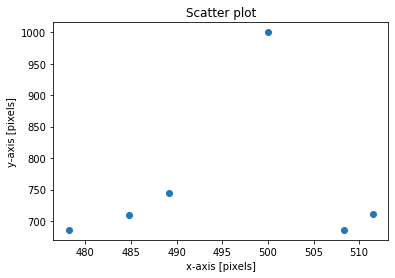

The values plotted above have error range of +/-4 


In [4]:
import numpy as np
import glob

# Creating empty lists and arrays to store our data for further calculations
files_names = []
x_distance_shift = np.array([])
y_distance_shift = np.array([])

# Loading or data file names/strings
files = glob.glob("data/*")

# Selecting bin width for our calculations
bin_width = 5

# Saving of file names/strings in a list "files_names"
for i,f in enumerate(files):
    files_names.append(f)


for f in range(len(files_names)-2):
    
    d12, d13, d23 = input_for_distance(files_names[0],files_names[f+1],files_names[f+2],bin_width)
    
    # for x-axis
    b_for_xaxis = np.array([[d12[0]], [d13[0]], [d23[0]], [500]])
    
    # for y-axis
    b_for_yaxis = np.array([[d12[1]], [d13[1]], [d23[1]], [1000]])
    
    # To get the "x" matrix for x-axis which contains x-shift of the image
    x_matrix_for_xaxis = np.dot(Ax_inv,b_for_xaxis)
    
    # To get the "x" matrix for y-axis which contains y-shift of the image
    x_matrix_for_yaxis = np.dot(Ax_inv,b_for_yaxis)    
    
#     print(f'For x-axis Our required "x" matrix is = \n {x_matrix_for_xaxis} \n -------------------------------------------------------------')
#     print(f'For y-axis Our required "x" matrix is = \n {x_matrix_for_yaxis} \n _____________________________________________________________')
    
    
    # Storing/appending "x" and "y" shifts of all the images into arrays to plot them later
    if(f == 0):
        x_distance_shift = np.append(x_distance_shift,x_matrix_for_xaxis[0]) 
        x_distance_shift = np.append(x_distance_shift,x_matrix_for_xaxis[1])
        x_distance_shift = np.append(x_distance_shift,x_matrix_for_xaxis[2])
        
        y_distance_shift = np.append(y_distance_shift,x_matrix_for_yaxis[0]) 
        y_distance_shift = np.append(y_distance_shift,x_matrix_for_yaxis[1])
        y_distance_shift = np.append(y_distance_shift,x_matrix_for_yaxis[2])        

    else:
        x_distance_shift = np.append(x_distance_shift,x_matrix_for_xaxis[2])
        y_distance_shift = np.append(y_distance_shift,x_matrix_for_yaxis[2]) 
        
        
# Plotting scatter plot
plt.scatter(x_distance_shift, y_distance_shift)
plt.title('Scatter plot')
plt.xlabel('x-axis [pixels]')
plt.ylabel('y-axis [pixels]')
plt.show()

print(f'The values plotted above have error range of +/-4 ')